# Lab Work : Digital signal processing
*Alexandre Coumes*
*Charles Angely*

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

## Family of filters
### Butterworth

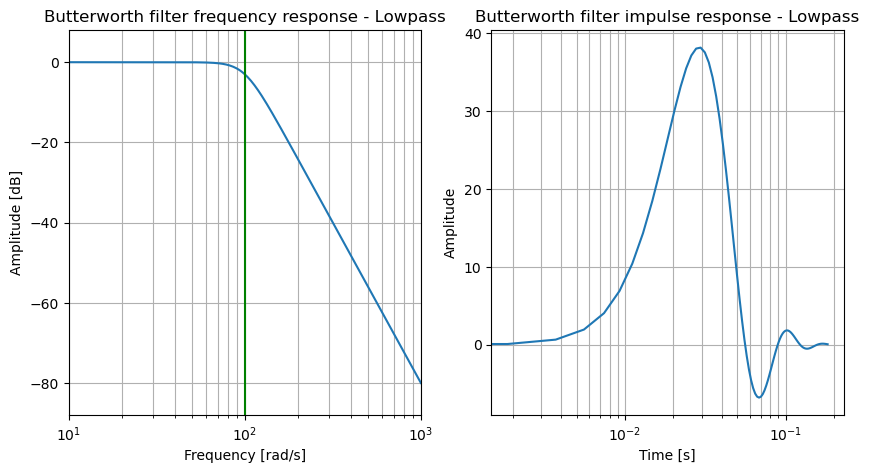

In [12]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
t, y = signal.impulse((b,a))

# ==== Plotting ====
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response - Lowpass')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
# Impulse response
plt.subplot(1,2,2)
plt.semilogx(t,y)
plt.title('Butterworth filter impulse response - Lowpass')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(which='both', axis='both')

Ici on construit un filtre dans le domaine fréquentielle.

### Chebychev

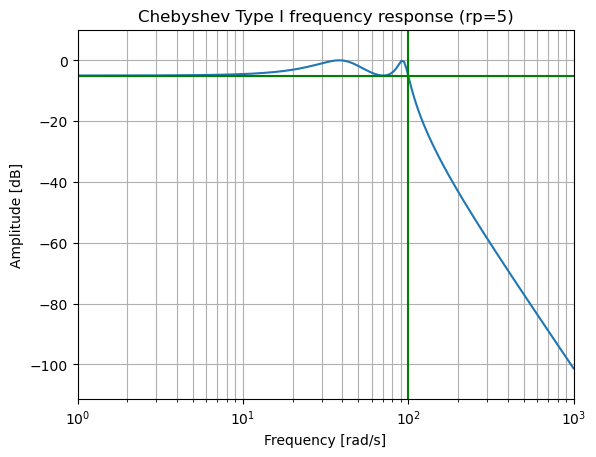

In [13]:
b, a = signal.cheby1(4, 5, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()